In [1]:
# Plot 1 for Data Incubator Challenge Questions:
# Import Libraries
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
# Import data
decks = pd.read_csv('data.csv')
cards = pd.read_json('refs.json')
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Let's only use Ranked Decks.
decks = pd.DataFrame(decks)
decks['deck_type'] = decks['deck_type'].astype('str') 
Ranked = pd.DataFrame(decks.loc[decks["deck_type"] == "Ranked Deck"])
Ranked['year'] = Ranked['date'].astype(str).str[0:4]
sets = list(Ranked['deck_set'].value_counts(sort=False).index)

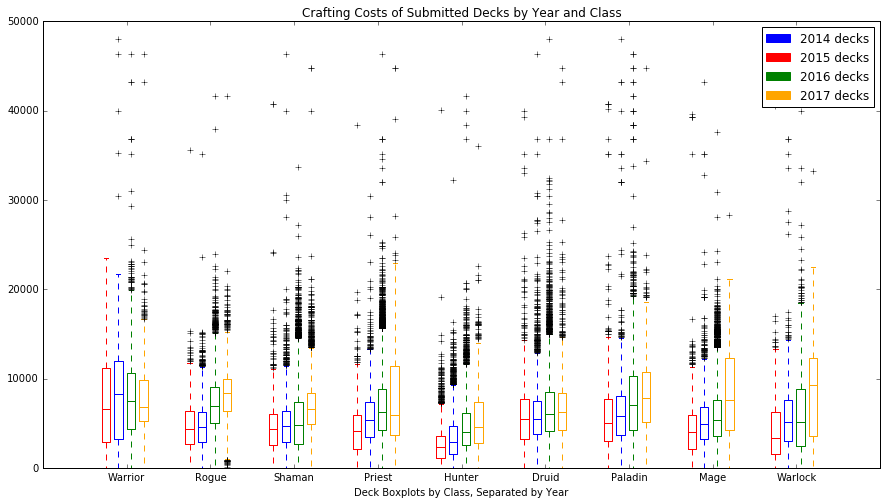

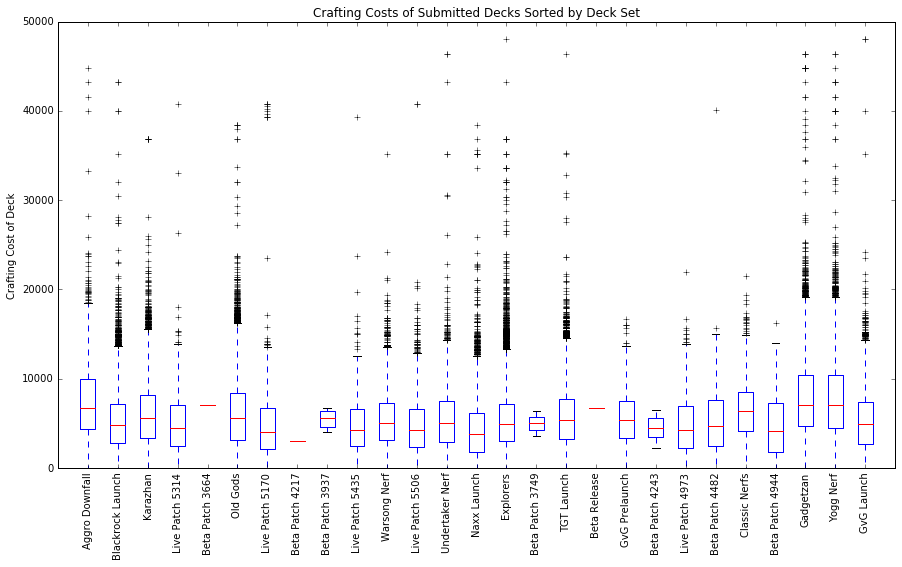

In [10]:
# Now, let's look at the distributions of crafting costs of decks per class over time.
import matplotlib.patches as mpatches
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes 
Ranked['year'].apply(str) 
Ranked['deck_class'].apply(str) 
Ranked['year'].apply(str)  
# function for setting the colors of the box plots pairs
color = ['red', 'blue',"green", "orange"]
def setBoxColors(bp):
    plt.setp(bp['boxes'][0], color=color[0])
    plt.setp(bp['boxes'][1], color=color[1])
    plt.setp(bp['boxes'][2], color=color[2])
    plt.setp(bp['boxes'][3], color=color[3])
    
    plt.setp(bp['whiskers'][0], color=color[0])
    plt.setp(bp['whiskers'][1], color=color[0])
    plt.setp(bp['whiskers'][2], color=color[1])
    plt.setp(bp['whiskers'][3], color=color[1]) 
    plt.setp(bp['whiskers'][4], color=color[2])
    plt.setp(bp['whiskers'][5], color=color[2])
    plt.setp(bp['whiskers'][6], color=color[3])
    plt.setp(bp['whiskers'][7], color=color[3])
    
    plt.setp(bp['caps'][0], color=color[0])
    plt.setp(bp['caps'][1], color=color[0])
    plt.setp(bp['caps'][2], color=color[1])
    plt.setp(bp['caps'][3], color=color[1]) 
    plt.setp(bp['caps'][4], color=color[2])
    plt.setp(bp['caps'][5], color=color[2])
    plt.setp(bp['caps'][6], color=color[3])
    plt.setp(bp['caps'][7], color=color[3])

    plt.setp(bp['medians'][0], color=color[0])
    plt.setp(bp['medians'][1], color=color[1])
    plt.setp(bp['medians'][2], color=color[2])
    plt.setp(bp['medians'][3], color=color[3])

fig = figure(figsize=(15,8))
# Data:
classes = list(Ranked['deck_class'][Ranked['year'] == '2017'].value_counts(sort=False).index)
j = 1
for i in classes:
    # for X for each value, I need to get the series of 
    X = [[],[],[],[]]
    for k in range(4):
        year = 2014+k
        X[k] = Ranked["craft_cost"][(Ranked['year'] == str(year)) & (Ranked["deck_class"].astype(str)== i)]#.value_counts(sort=False)
    bp = boxplot(X, positions = [j+0.5, j+0.8, j+1.1, j+1.4], widths = 0.2)
    setBoxColors(bp)
    j +=2

ax = axes()
hold(True)
# set axes limits and labels
xlim(0,20)
ax.set_xticklabels(classes)
ax.set_xticks([2,4,6,8,10,12,14,16,18])
# draw temporary  lines for the legend
blue_patch = mpatches.Patch(color='blue', label='2014 decks')
red_patch = mpatches.Patch(color='red', label='2015 decks')
green_patch = mpatches.Patch(color='green', label='2016 decks')
orange_patch = mpatches.Patch(color='orange', label='2017 decks')
plt.legend(handles=[blue_patch,red_patch, green_patch, orange_patch])
plt.title("Crafting Costs of Submitted Decks by Year and Class")
plt.xlabel("Deck Boxplots by Class, Separated by Year")
savefig('data_plot1_1.png')
# Now let's make a similar plot for the classes to sets
fig2 = figure(figsize=(15,8))
sets = list(Ranked['deck_set'].value_counts(sort=False).index)
j = 0
for i in sets:
    # for X for each value, I need to get the series of 
    X = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    X[j] = Ranked["craft_cost"][Ranked['deck_set'] == str(i)]#.value_counts(sort=False)
    bp = boxplot(X, widths = 0.5)
    j +=1

ax = axes()
hold(True)
# set axes limits and labels
xlim(0,20)
ax.set_xticklabels(sets, rotation = 90)
ax.set_xticks(list(range(1,29)))
plt.title("Crafting Costs of Submitted Decks Sorted by Deck Set")
plt.ylabel("Crafting Cost of Deck")
savefig('data_plot1_2.png')
show()